#gettting started

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('33.png')
imgplot = plt.imshow(img)

pts = np.asarray(plt.ginput(3, timeout=-1))
plt.show()

(639, 763, 3)


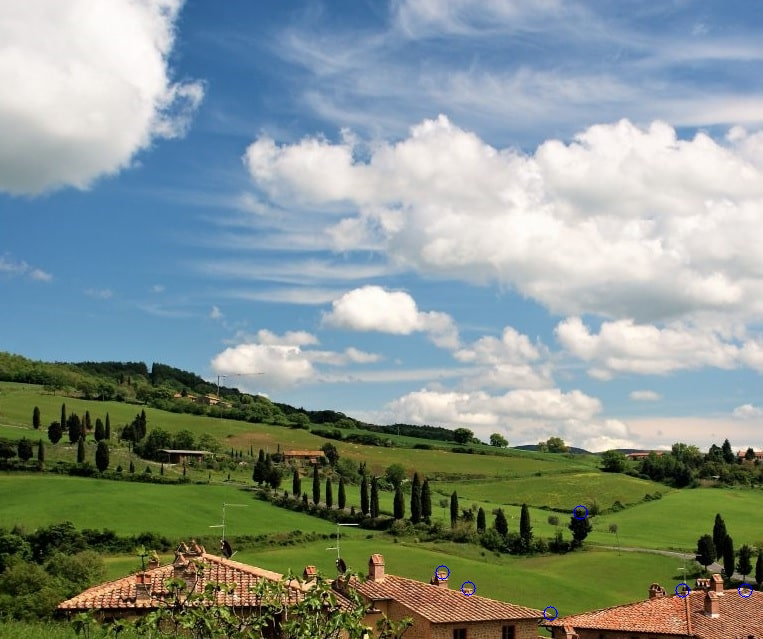

In [0]:
a=cv2.imread("111.png")
print(a.shape)
cv2.circle(img=a,center=(745,590), color=200,radius=7, thickness=1, lineType=8, shift=0)#p1
cv2.circle(img=a,center=(682,590), color=200,radius=7, thickness=1, lineType=8, shift=0)#p2
cv2.circle(img=a,center=(550,613), color=200,radius=7, thickness=1, lineType=8, shift=0)#p3
cv2.circle(img=a,center=(468,588), color=200,radius=7, thickness=1, lineType=8, shift=0)#p4
cv2.circle(img=a,center=(442,572), color=200,radius=7, thickness=1, lineType=8, shift=0)#p5
cv2.circle(img=a,center=(580,512), color=200,radius=7, thickness=1, lineType=8, shift=0)#p6
first_points=np.array([[745,590,1],[682,590,1],[550,613,1],[468,588,1],[442,572,1],[580,512,1]])
cv2_imshow(a)

(276, 649, 3)


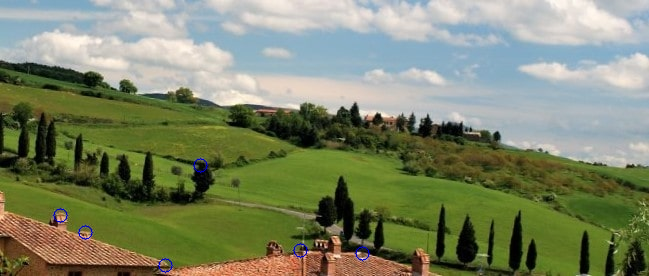

In [0]:
b=cv2.imread("3.jpg")
print(b.shape)
cv2.circle(img=b,center=(362,253), color=200,radius=7, thickness=1, lineType=8, shift=0)#p1
cv2.circle(img=b,center=(300,250), color=200,radius=7, thickness=1, lineType=8, shift=0)#p2
cv2.circle(img=b,center=(165,265), color=200,radius=7, thickness=1, lineType=8, shift=0)#p3
cv2.circle(img=b,center=(85,232), color=200,radius=7, thickness=1, lineType=8, shift=0)#p4
cv2.circle(img=b,center=(60,215), color=200,radius=7, thickness=1, lineType=8, shift=0)#p5
cv2.circle(img=b,center=(200,165), color=200,radius=7, thickness=1, lineType=8, shift=0)#p6
second_points=np.array([[362,253,1],[300,250,1],[165,265,1],[85,232,1],[60,215,1],[200,165,1]])

cv2_imshow(b)

#2 getting homography matrix

In [0]:
first_points=np.array([[745,590,1],[682,590,1],[550,613,1],[468,588,1],[442,572,1],[580,512,1]])
second_points=np.array([[362,253,1],[300,250,1],[165,265,1],[85,232,1],[60,215,1],[200,165,1]])

In [0]:
def transform_points(points):
  to_return=[]
  for point in points:
    temp=np.zeros(shape=(3,8))
    temp[0,0:3]=point
    temp[1,3:6]=point
    temp[2,6:]=point[:-1]
    to_return.append(temp)

  return np.array(to_return).reshape((-1,8))


In [0]:
k=transform_points(first_points)
print(second_points)
j=second_points.reshape((-1,1))
print("--------------")
print(j)
# print(k)

In [0]:
print(j.shape)
print(k.shape)

(18, 1)
(18, 8)


In [0]:
print(k)

[[745. 590.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 745. 590.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 745. 590.]
 [682. 590.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 682. 590.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 682. 590.]
 [550. 613.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 550. 613.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 550. 613.]
 [468. 588.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 468. 588.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 468. 588.]
 [442. 572.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 442. 572.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 442. 572.]
 [580. 512.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 580. 512.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 580. 512.]]


In [0]:
def get_homography(a,b):
  homo=np.linalg.lstsq(a,b)
  return homo

In [0]:
x=get_homography(k,j)

In [0]:
print(x)

(array([[ 1.00159695e+00],
       [-4.38849244e-02],
       [-3.58079228e+02],
       [ 6.80857193e-02],
       [ 1.00186007e+00],
       [-3.87916390e+02],
       [ 9.90249429e-05],
       [ 1.62754486e-03]]), array([6.13739505]), 8, array([2.01111111e+03, 2.01111111e+03, 2.01110963e+03, 1.89515412e+02,
       1.89515412e+02, 1.89515299e+02, 1.31291816e-01, 1.31291816e-01]))


In [0]:
x1,x2,x3,x4=x
print(x1)

[[ 1.00159695e+00]
 [-4.38849244e-02]
 [-3.58079228e+02]
 [ 6.80857193e-02]
 [ 1.00186007e+00]
 [-3.87916390e+02]
 [ 9.90249429e-05]
 [ 1.62754486e-03]]


checking that the output is correct 

In [0]:
j1=np.matmul(k,x1)
print(j1)

[[362.21839553]
 [253.90491366]
 [  1.03402505]
 [299.11778757]
 [249.61551334]
 [  1.02778648]
 [165.8976367 ]
 [263.67098007]
 [  1.05214872]
 [ 84.86380977]
 [233.04144926]
 [  1.00334005]
 [ 59.52444782]
 [215.24145939]
 [  0.97472468]
 [200.37792261]
 [164.52568428]
 [  0.89073743]]


#3-warping between image planes

In [0]:
import math
def warp(image_1,image_2,H,n_channels=3):
  res_x = [x for x in range(image_1.shape[0])]
  res_y = [x for x in range(image_1.shape[1])]
  
  img1_indexes = res_x_y = [[x,y,1] for x in res_x for y in res_y]
  transformed_img1_indexes = transform_points(res_x_y)

  img1_mul_by_H = np.matmul(transformed_img1_indexes,H)
  
  new_xpoints = np.round(np.array([img1_mul_by_H[x] for x in range(0,len(img1_mul_by_H),3)]))
  new_ypoints = np.round(np.array([img1_mul_by_H[x] for x in range(1,len(img1_mul_by_H),3)]))

  h2, w2 = image_2.shape[:2]
  hh,ww = max(max(new_ypoints),h2)+abs(min(new_ypoints)),max(max(new_xpoints),w2)+abs(min(new_xpoints))
  hh,ww,h2,w2 = int(hh),int(ww),int(h2),int(w2)
  vis = np.zeros((hh,ww,3), np.uint8)

  vis[int(abs(min(new_ypoints))):h2+int(abs(min(new_ypoints))),int(abs(min(new_xpoints))):w2+int(abs(min(new_xpoints))),:n_channels] = image_2
  cv2_imshow(vis)

  x_shift = int(abs(min(new_xpoints)))
  y_shift = int(abs(min(new_ypoints)))
  i,j=0,0
  for x,y in zip(new_xpoints,new_ypoints):
    if (x<0 or y<0) :#or y>image_2.shape[1]:
      vis[int(x)+x_shift, int(y)+y_shift,:n_channels] =  image_1[i][j]
    j+=1
    if j>=image_1.shape[1]:j=0;i+=1
  
  cv2_imshow(vis)
  median = cv2.medianBlur(vis,3)
  cv2_imshow(median)
  
  return vis,median

In [0]:
res,smoothed = warp(a,b,x1)

#Appling on provided images displaying mosaic

%matplotlib inline
matplotlib.use('TkAgg')
from matplotlib.pyplot import ginput
import cv2
help(ginput)
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cv2.imread("22.png",cv2.IMREAD_UNCHANGED))
print("Please click")
x = plt.ginput(6)
print("clicked", x)
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


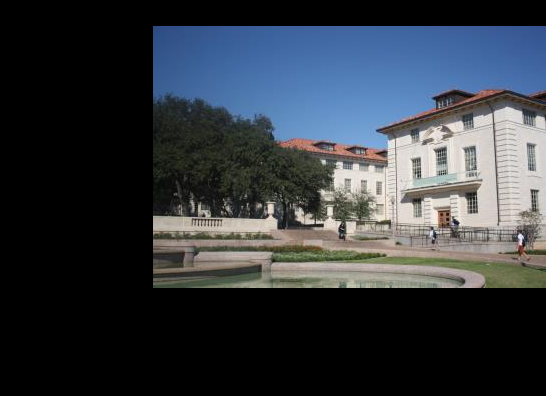

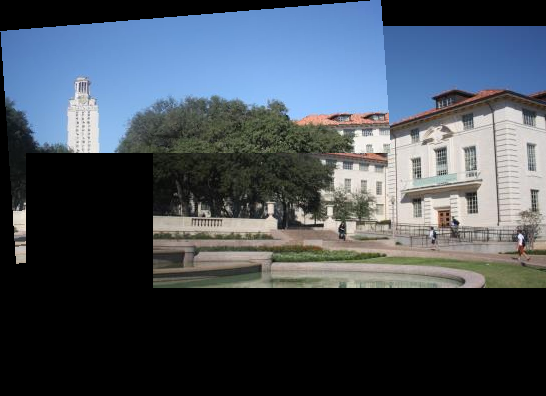

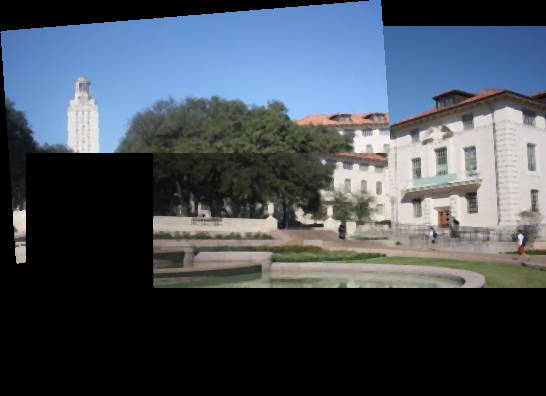

In [0]:
first_points_ = [(346.21769450594456, 129.0677125496201), (383.0150884140096, 131.62308712656906), (351.8395185752323, 145.93318475748325), (369.727140613875, 147.4664095036526), (388.1258375679075, 147.9774844190424), (351.3284436598425, 167.39833120385453)]
second_points_ = [(175.00759785036425, 120.37943898799364), (206.69424260453135, 125.49018814189157), (179.09619717348258, 136.733836280467), (194.93951955056613, 139.28921085741595), (210.78284192764968, 141.33351051897512), (175.51867276575402, 157.17683289605867)]
first_points_   = np.round(np.array([list(x)+[1] for x in first_points_ ]))
second_points_  = np.round(np.array([list(x)+[1] for x in second_points_]))
_,_ = warp(cv2.imread("22.png"),cv2.imread("33.png"),get_homography(transform_points(first_points_),second_points_.reshape((-1,1)))[0])

# Bonus 

# 1. Replace the manual correspondence stage with automatic *interest*

Using SIFT algorithm for interest points detection and matching

In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

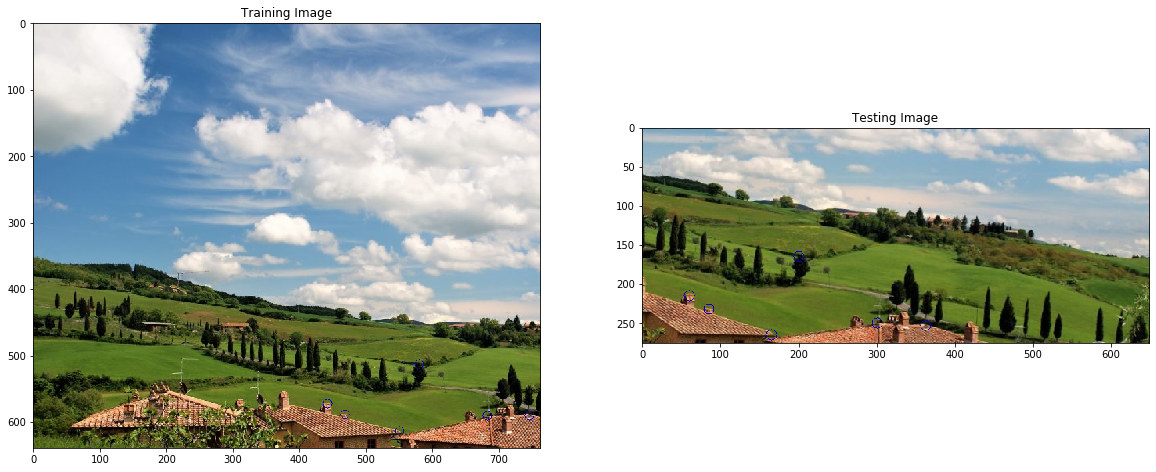

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('1.png')
image2 = cv2.imread('3.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
test_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Detect keypoints and Create Descriptor

Number of Keypoints Detected In The Training Image:  2174


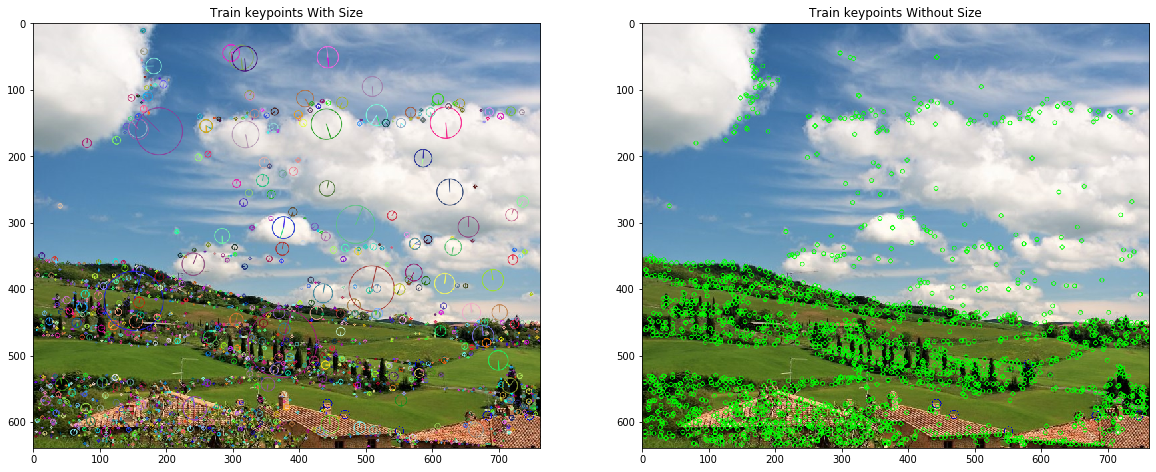

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)


keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')
# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

Matching Keypoints

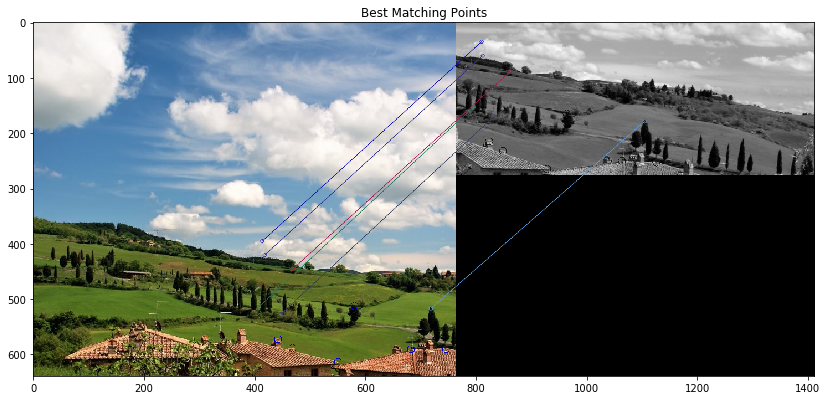


Number of Matching Keypoints Between The Training and test Image:  2174


In [0]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches[:6], test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()
best_corres = matches[:6]
# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and test Image: ", len(matches))

Pick best 6 matches as our correspondences and get their coordinates

In [0]:
best_corres = matches[:6]
# Initialize lists
list_kp1 = []
list_kp2 = []
# For each match...
for mat in best_corres:
    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx
    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = train_keypoints[img1_idx].pt
    (x2,y2) = test_keypoints[img2_idx].pt
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

In [0]:
#Or Just do this instead ( less code )
best_corres = matches[:6]
list_kp1 = [train_keypoints[mat.queryIdx].pt for mat in best_corres] 
list_kp2 = [test_keypoints[mat.trainIdx].pt for mat in best_corres]

In [0]:
print(list_kp1)
print(list_kp2)

[(535.7757568359375, 443.05743408203125), (658.7899169921875, 486.64117431640625), (412.4513854980469, 503.1545104980469), (422.2126770019531, 611.352783203125), (446.7317199707031, 526.9983520507812)]
[(164.89816284179688, 91.98408508300781), (284.0445251464844, 144.63177490234375), (37.3702392578125, 142.58155822753906), (39.092918395996094, 251.37692260742188), (69.71113586425781, 169.3075714111328)]


# Now lets run our Mosiac algorithm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


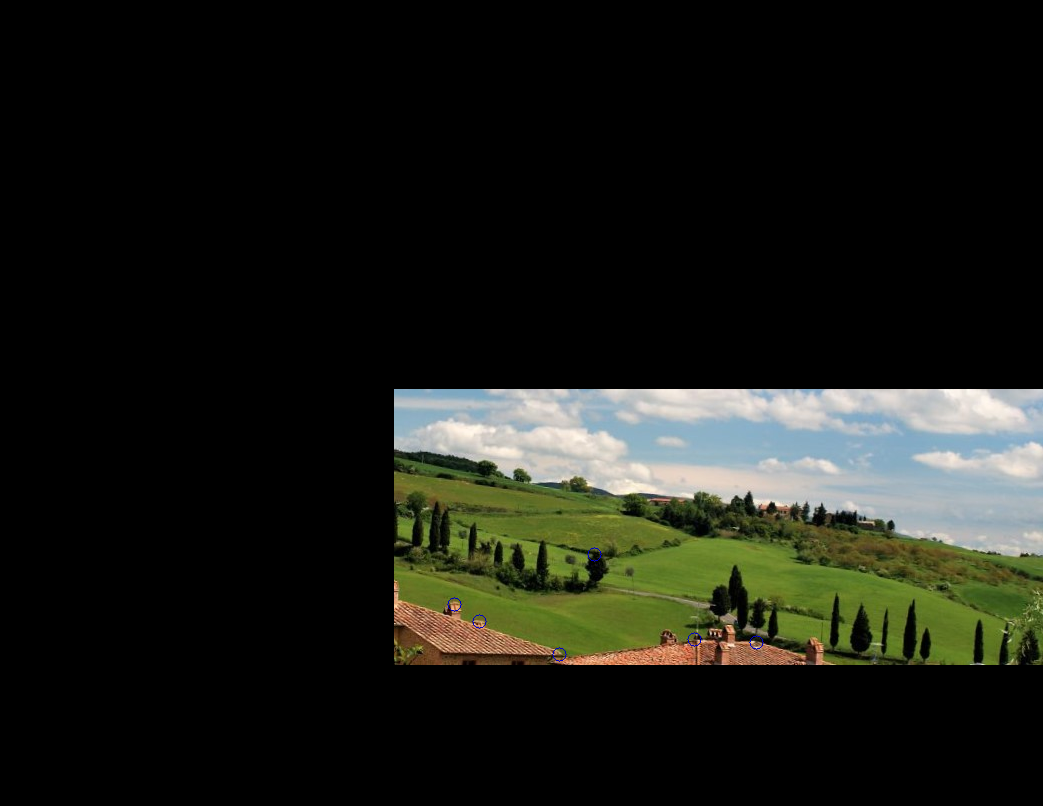

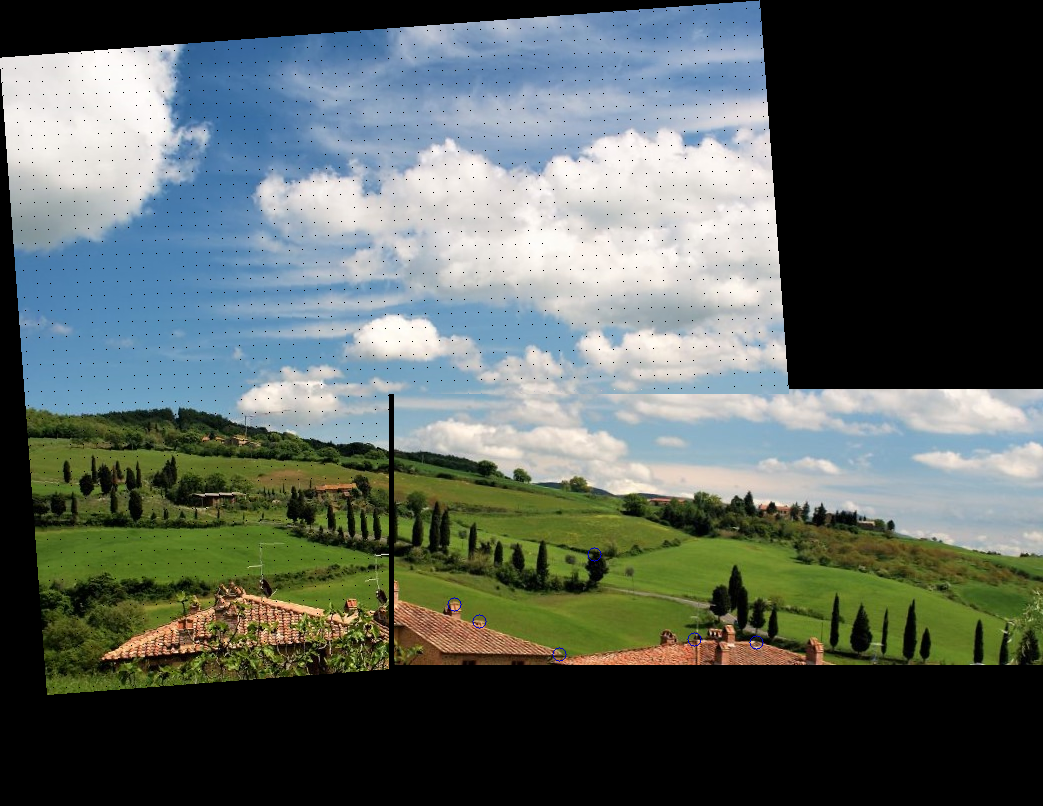

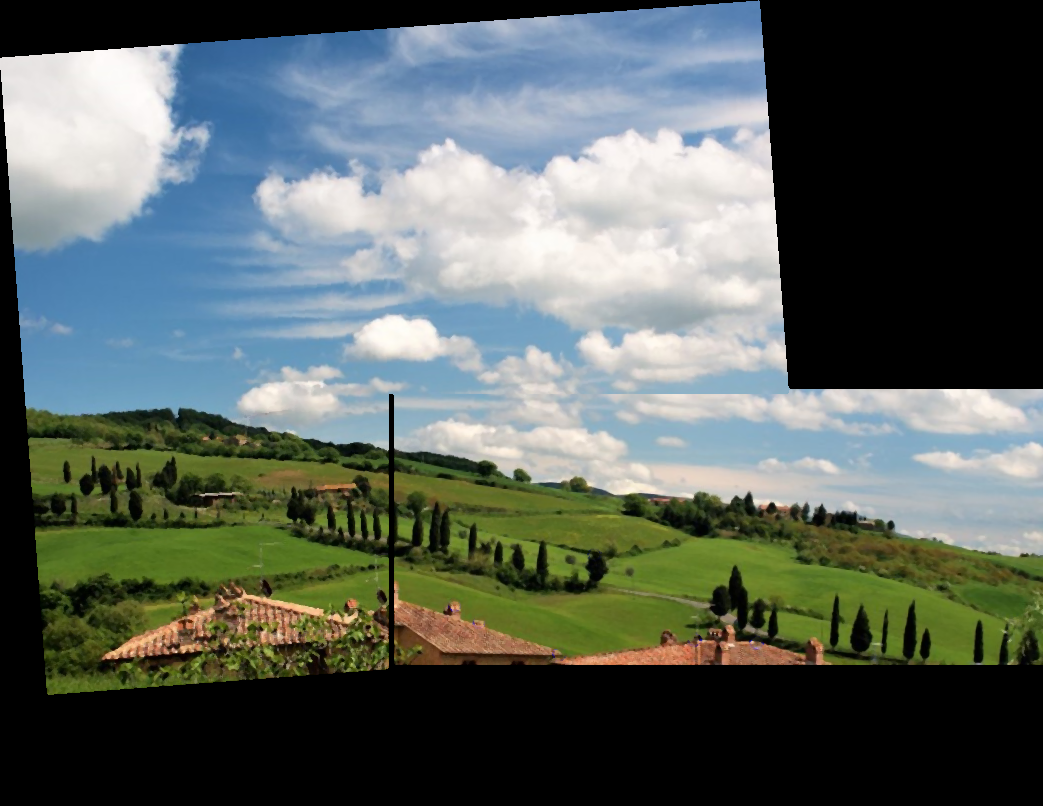

In [0]:
first_points_2   = np.round(np.array([list(x)+[1] for x in list_kp1 ]))
second_points_2  = np.round(np.array([list(x)+[1] for x in list_kp2 ]))
_,_ = warp(image1,image2,get_homography(transform_points(first_points_2),second_points_2.reshape((-1,1)))[0])

# Try on my own pic not really my own xD

In [0]:
a=cv2.imread("333.png")
print(a.shape)
first_points_3=np.array([[40.3137,330.1857,1],[162.6886,367.9040,1],[233.0960,117.2870,1],[112.3976,183.5035,1]])
#cv2_imshow(a)

b=cv2.imread("111.png")
print(b.shape)
second_points_3=np.array([[416.6583,322.6420,1],[534.8423,361.1985,1],[603.5733,108.9051,1],[484.5512,177.6362,1]])
_,_ = warp(a,b,get_homography(transform_points(first_points_3),second_points_3.reshape((-1,1)))[0])

# Second Bonus ( RANSAC )

In [0]:
import random
#
# Runs sift algorithm to find features
#
def findFeatures(img):
    print("Finding Features...")
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    #img = cv2.drawKeypoints(img, keypoints)
    return keypoints, descriptors

#
# Matches features given a list of keypoints, descriptors, and images
#
def matchFeatures(kp1, kp2, desc1, desc2, img1, img2):
    print("Matching Features...")
    matcher = cv2.BFMatcher(cv2.NORM_L2, False)
    matches = matcher.match(desc1, desc2)
    return matches
#
#Calculate the geometric distance between estimated points and original points
#
def geometricDistance(correspondence, h):

    p1 = np.array([[correspondence[0].item(0), correspondence[0].item(1), 1]])
    p1 = transform_points(p1)
    estimatep2 = np.matmul(p1,h)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)


def get_homography(a,b):
  homo=np.linalg.lstsq(a,b)
  return homo
#
#Runs through ransac algorithm, creating homographies from random correspondences
#
def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        first_pointz=np.zeros(shape=(4,3));
        second_pointz=np.zeros(shape=(4,3))
        for i in range(0,4):
          corr1 = corr[random.randrange(0, len(corr))]
          x1 = corr1.item(0);y1 = corr1.item(1)
          x2 = corr1.item(2);y2 = corr1.item(3)
          first_pointz[i]=np.array([x1,y1,1])
          second_pointz[i]=np.array([x2,y2,1])

        k=transform_points(first_points)
        j=second_points.reshape((-1,1))

        #call the homography function on those points
        h = get_homography(k,j)[0]

        inliers = []

        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            print("distance: ",d)
            if d < 4:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
            print("Found better H")
        print ("Corr size: ", len(corr), " NumInliers: ", len(inliers), "Max inliers: ", len(maxInliers))

        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers


In [0]:
#find features and keypoints
def getCorrList(img1,img2):
  correspondenceList = []
  kp1, desc1 = findFeatures(img1)
  kp2, desc2 = findFeatures(img2)
  print ("Found keypoints in image1: " + str(len(kp1)))
  print ("Found keypoints in image2: " + str(len(kp2)))
  keypoints = [kp1,kp2]
  matches = matchFeatures(kp1, kp2, desc1, desc2, img1, img2)
  for match in matches:
    (x1, y1) = keypoints[0][match.queryIdx].pt
    (x2, y2) = keypoints[1][match.trainIdx].pt
    correspondenceList.append([x1, y1, x2, y2])
    
  corrs = np.matrix(correspondenceList)
  return corrs

In [0]:
#run ransac algorithm
img1=cv2.imread("1.png")
img2=cv2.imread("3.png")
corrs = getCorrList(img1,img2)
finalH, inliers = ransac(corrs, 0.6)
print ("Final homography: ", finalH)
print ("Final inliers count: ", len(inliers))

# Bonus section 2

In [0]:
#
# Runs sift algorithm to find features
#
def findFeatures(img):
    print("Finding Features...")
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

#
# Matches features given a list of keypoints, descriptors, and images
#
def matchFeatures(kp1, kp2, desc1, desc2, img1, img2):
    print("Matching Features...")
    matcher = cv2.BFMatcher(cv2.NORM_L2, True)
    matches = matcher.match(desc1, desc2)
    return matches


#
# Computers a homography from 4-correspondences
#
def calculateHomography(correspondences):
    #loop through correspondences and create assemble matrix
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h
#
#Calculate the geometric distance between estimated points and original points
#
def geometricDistance(correspondence, h):
    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)
#
#Runs through ransac algorithm, creating homographies from random correspondences
#
def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))

        #call the homography function on those points
        h = calculateHomography(randomFour)
        inliers = []

        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        print ("Corr size: ", len(corr), " NumInliers: ", len(inliers), "Max inliers: ", len(maxInliers))

        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers  





In [0]:
import cv2
import numpy as np
import getopt
import sys
import random

img1=cv2.imread("101.png")
img2=cv2.imread("202.png")
#find features and keypoints
correspondenceList = []
if img1 is not None and img2 is not None:
    kp1, desc1 = findFeatures(img1)
    kp2, desc2 = findFeatures(img2)
    keypoints = [kp1,kp2]
    matches = matchFeatures(kp1, kp2, desc1, desc2, img1, img2)
    for match in matches:
        (x1, y1) = keypoints[0][match.queryIdx].pt
        (x2, y2) = keypoints[1][match.trainIdx].pt
        correspondenceList.append([x1, y1, x2, y2])

    corrs = np.matrix(correspondenceList)
    #run ransac algorithm
    finalH, inliers = ransac(corrs, 0.6)
    print ("Final homography: ", finalH)
    print ("Final inliers count: ", len(inliers))

Finding Features...
Finding Features...
Matching Features...
Corr size:  2535  NumInliers:  6 Max inliers:  6
Corr size:  2535  NumInliers:  4 Max inliers:  6
Corr size:  2535  NumInliers:  9 Max inliers:  9
Corr size:  2535  NumInliers:  4 Max inliers:  9
Corr size:  2535  NumInliers:  6 Max inliers:  9
Corr size:  2535  NumInliers:  4 Max inliers:  9
Corr size:  2535  NumInliers:  4 Max inliers:  9
Corr size:  2535  NumInliers:  7 Max inliers:  9
Corr size:  2535  NumInliers:  9 Max inliers:  9
Corr size:  2535  NumInliers:  4 Max inliers:  9
Corr size:  2535  NumInliers:  6 Max inliers:  9
Corr size:  2535  NumInliers:  24 Max inliers:  24
Corr size:  2535  NumInliers:  6 Max inliers:  24
Corr size:  2535  NumInliers:  7 Max inliers:  24
Corr size:  2535  NumInliers:  4 Max inliers:  24
Corr size:  2535  NumInliers:  6 Max inliers:  24
Corr size:  2535  NumInliers:  6 Max inliers:  24
Corr size:  2535  NumInliers:  5 Max inliers:  24
Corr size:  2535  NumInliers:  4 Max inliers:  24

In [0]:
print(finalH) # Best homography

[[ 1.00215871e+00 -7.51596426e-02 -3.37949050e+02]
 [ 7.61766736e-02  1.00520269e+00 -3.93645763e+02]
 [ 1.59228562e-06  1.00565382e-05  1.00000000e+00]]


In [0]:
homo = finalH.reshape(-1,1)[:8]
print(homo)

[[ 1.31366944e+00]
 [-7.22838752e-02]
 [-5.84363274e+02]
 [ 1.75046217e-01]
 [ 1.22700015e+00]
 [-1.72758534e+02]
 [ 2.86287728e-04]
 [ 2.46666465e-05]]


In [0]:
_,_ = warp(img1,img2,homo)